## Filter Methods: Statistical & Ranking Methods

**Statistical Ranking Methods:**

1. **Information Gain - Mutual Information**

    Mutual Information measures how much information the presence/absence of a feature contributes to making the correct prediction on target Y. It measures how much knowing about one variable reduces the uncertainity about the other.

2. **Fisher Score**
3. **Univariate Tests**
4. **Univariate ROC/AUC/RMSE**

**Two Steps:**

1. Rank features based on certain criteria/metric.
2. Select features with highest ranking.

In [109]:
# Import Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
# mutual_info_classif, mutual_info_regression: Functions for calculating Mutual Information Between classes and the target
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression
from sklearn.feature_selection import SelectKBest, SelectPercentile
%matplotlib inline

In [167]:
# Load Dataset
df = pd.read_csv('C:\\Users\\chaithu\\Feature-Selection-for-Machine-Learning-master\\Filter Methods\\CSDMC2010EW.csv', nrows=6294)
df.shape

(4247, 142)

In [168]:
df.head()

,ID,MaxLongestRepeatingCharacterSubject,MinCharacterDiversitySubject,RatioNonAlphaNumToAllSubject,RatioDigitToAllSubject,RatioUpperToAllSubject,RatioUpperLowerSubject,CountCharsSubject,AllCountCapWordSubject,CountCapWordSubject,...,WordsMaxChar,CountDigitChars,WordsAVGChar,CountWordLess3Char,CountChars,CountWordLonger6Char,AlphaNumeric,UniqueContentTypesAttachment,CountOfAttachments,Class
0,1,1,0.0,0.0,0.0,0.0,0.0,0,0,0,...,14,15,3.931174,176,2425,84,0,0,0,1
1,2,1,0.0,0.0,0.0,0.0,0.0,0,0,0,...,13,0,4.776923,41,858,32,0,0,0,1
2,3,1,0.0,0.0,0.0,0.0,0.0,0,0,0,...,13,7,3.707602,60,852,33,0,0,0,1
3,4,1,0.0,0.0,0.0,0.0,0.0,0,0,0,...,13,26,3.010526,33,398,11,0,0,0,1
4,5,1,0.0,0.0,0.0,0.0,0.0,0,0,0,...,12,12,3.536424,35,736,25,0,0,0,1


In [169]:
# Get Numerical features from dataset# Get N 
numerics = ['int16', 'int32','int64', 'float16', 'float32', 'float64']
numerical_features = list(df.select_dtypes(include=numerics).columns)

In [170]:
data = df[numerical_features]

In [171]:
data.head()

,ID,MaxLongestRepeatingCharacterSubject,MinCharacterDiversitySubject,RatioNonAlphaNumToAllSubject,RatioDigitToAllSubject,RatioUpperToAllSubject,RatioUpperLowerSubject,CountCharsSubject,AllCountCapWordSubject,CountCapWordSubject,...,WordsMaxChar,CountDigitChars,WordsAVGChar,CountWordLess3Char,CountChars,CountWordLonger6Char,AlphaNumeric,UniqueContentTypesAttachment,CountOfAttachments,Class
0,1,1,0.0,0.0,0.0,0.0,0.0,0,0,0,...,14,15,3.931174,176,2425,84,0,0,0,1
1,2,1,0.0,0.0,0.0,0.0,0.0,0,0,0,...,13,0,4.776923,41,858,32,0,0,0,1
2,3,1,0.0,0.0,0.0,0.0,0.0,0,0,0,...,13,7,3.707602,60,852,33,0,0,0,1
3,4,1,0.0,0.0,0.0,0.0,0.0,0,0,0,...,13,26,3.010526,33,398,11,0,0,0,1
4,5,1,0.0,0.0,0.0,0.0,0.0,0,0,0,...,12,12,3.536424,35,736,25,0,0,0,1


In [172]:
X = data.drop(['Class','ID'], axis=1)
X.head()

,MaxLongestRepeatingCharacterSubject,MinCharacterDiversitySubject,RatioNonAlphaNumToAllSubject,RatioDigitToAllSubject,RatioUpperToAllSubject,RatioUpperLowerSubject,CountCharsSubject,AllCountCapWordSubject,CountCapWordSubject,AllCountDigitWordSubject,...,SpecialChars,WordsMaxChar,CountDigitChars,WordsAVGChar,CountWordLess3Char,CountChars,CountWordLonger6Char,AlphaNumeric,UniqueContentTypesAttachment,CountOfAttachments
0,1,0.0,0.0,0.0,0.0,0.0,0,0,0,0,...,535,14,15,3.931174,176,2425,84,0,0,0
1,1,0.0,0.0,0.0,0.0,0.0,0,0,0,0,...,262,13,0,4.776923,41,858,32,0,0,0
2,1,0.0,0.0,0.0,0.0,0.0,0,0,0,0,...,200,13,7,3.707602,60,852,33,0,0,0
3,1,0.0,0.0,0.0,0.0,0.0,0,0,0,0,...,102,13,26,3.010526,33,398,11,0,0,0
4,1,0.0,0.0,0.0,0.0,0.0,0,0,0,0,...,220,12,12,3.536424,35,736,25,0,0,0


In [173]:
y = data['Class']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Class, dtype: int64

In [174]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((2972, 140), (2972,), (1275, 140), (1275,))

### Mutual Information using Classification

In [175]:
# Calculate Mutual Information between each feature and the target
mutual_info = mutual_info_classif(X_train.fillna(0), y_train)
mutual_info

array([0.        , 0.        , 0.        , 0.009101  , 0.00871273,
       0.        , 0.01636652, 0.        , 0.        , 0.0016834 ,
       0.00333713, 0.        , 0.02516636, 0.        , 0.        ,
       0.0015173 , 0.00189415, 0.00244858, 0.01943579, 0.        ,
       0.00385758, 0.00136468, 0.00108504, 0.0068985 , 0.        ,
       0.        , 0.00722286, 0.00229877, 0.00185964, 0.        ,
       0.        , 0.        , 0.00111091, 0.        , 0.        ,
       0.00042437, 0.        , 0.00425712, 0.00414381, 0.00404984,
       0.        , 0.00241956, 0.        , 0.        , 0.        ,
       0.00639033, 0.        , 0.        , 0.        , 0.06747394,
       0.05355093, 0.0261776 , 0.07280776, 0.08172901, 0.05631399,
       0.08872961, 0.07619033, 0.07384346, 0.04187581, 0.08454619,
       0.03845876, 0.090945  , 0.0266919 , 0.05404415, 0.06743202,
       0.0757354 , 0.08872626, 0.06370049, 0.0643863 , 0.04293037,
       0.10298494, 0.0882765 , 0.08058264, 0.06558733, 0.03838

In [176]:
# Create Feature Target Mutual Information Series
mi_series = pd.Series(mutual_info)
mi_series.index = X_train.columns
mi_series.sort_values(ascending=False)

MinCharacterDiversity                  0.169452
LongestCapital                         0.109525
AvgWordsinParagraphs                   0.106072
FISimple                               0.102985
AvgCharinParagraphs                    0.102187
FKRI_WithoutStopwords                  0.090945
AvgSentenceinParagraphs                0.088915
Honore                                 0.088730
FogIndex                               0.088726
InverseFI                              0.088277
CountLines                             0.087064
FISimpleWithoutStopwords               0.084546
Entropy                                0.081729
SMOG                                   0.080583
WordLengthWithoutStopwords             0.076190
FogIndexWithoutStopWords               0.075735
RatioNonAlphaNumToAll                  0.075649
Colon                                  0.074988
InverseFI_WithoutStopwords             0.073843
CountUpperChars                        0.073837
YuleK                                  0

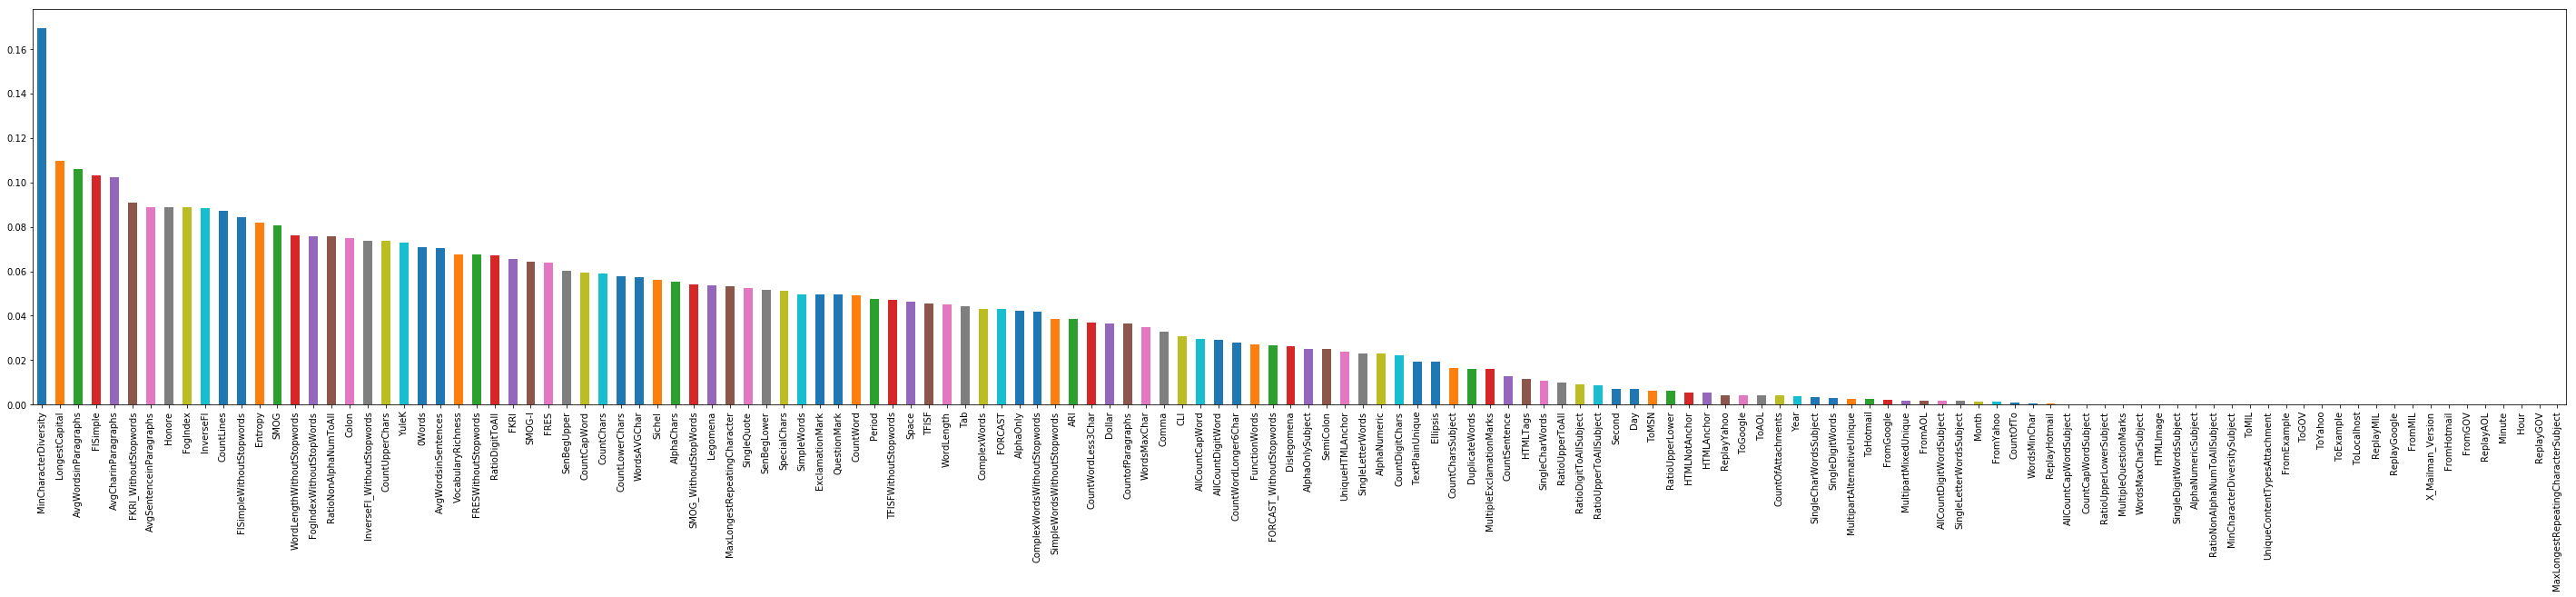

In [178]:
mi_series.sort_values(ascending=False).plot.bar(figsize=(50,8))

As we can see in the plot above from left to right, the features which have the most amount of mutual information is on the left and the features with the least amount of mutual information are on the right. Some of the features contribute a lot to the mutual information whereas some of them do not contribute anything. So, to select the important features from this list, we can set a threshold like maybe select the first 10 percentile of features or first 20 features etc.

To do this we can use a combination of "SelectKbest" or "SelectPercentile".

In [179]:
# Select K best features
k_best_features = SelectKBest(mutual_info_classif, k=25).fit(X_train.fillna(0), y_train)
print('Selected top 25 features: {}'.format(X_train.columns[k_best_features.get_support()]))

Selected top 25 features: Index(['VocabularyRichness', 'YuleK', 'Entropy', 'Honore',
       'WordLengthWithoutStopwords', 'InverseFI_WithoutStopwords',
       'FISimpleWithoutStopwords', 'FKRI_WithoutStopwords',
       'FogIndexWithoutStopWords', 'FogIndex', 'SMOG-I', 'FISimple',
       'InverseFI', 'SMOG', 'FKRI', 'MinCharacterDiversity',
       'RatioNonAlphaNumToAll', 'AvgWordsinSentences', 'AvgCharinParagraphs',
       'AvgWordsinParagraphs', 'AvgSentenceinParagraphs', '0Words',
       'LongestCapital', 'CountUpperChars', 'Colon'],
      dtype='object')


In [180]:
k_best_features.sort_values(ascending=False).plot.bar(figsize=(20,8))

AttributeError: 'SelectKBest' object has no attribute 'sort_values'

In [ ]:
a = df[['Month', 'FISimpleWithoutStopwords', 'FISimple', 'FKRI',
       'MaxLongestRepeatingCharacter', 'MinCharacterDiversity',
       'UniqueHTMLAnchor', 'RatioNonAlphaNumToAll', 'AvgCharinParagraphs',
       'AvgWordsinParagraphs', 'AvgSentenceinParagraphs', 'HTMLAnchor',
       'HTMLNotAnchor', 'LongestCapital', 'HTMLTags', 'ExclamationMark',
       'CountUpperChars', 'SpecialChars', 'CountDigitChars', 'CountChars','Class']]
a.head()

In [131]:
export_csv = a.to_csv ('C:\\Users\\chaithu\\Feature-Selection-for-Machine-Learning-master\\Filter Methods\\export_dataframe.csv', index = None, header=True) #Don't forget to add '.csv' at the end of the path


In [153]:
import numpy as np
import pandas as pd
import csv

from sklearn.model_selection import KFold
from sklearn.linear_model import SGDClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

def load_Data(dataset):
    data=[]
    target=[]
    dataset = "C://Users//chaithu//Feature-Selection-for-Machine-Learning-master//Filter Methods//"+ dataset + ".csv"
    with open(dataset,"r") as csvfile:
        csvreader = csv.reader(csvfile)
        fields = next(csvreader)
        for row in csvreader:
            lst=[]
            for i in range(len(row)-1):
                lst.append(eval(row[i]))
            data.append(lst)
            target.append(row[len(row)-1])
    return data,target


def applyKFold(data,target,algo):
    acc=0
    kf = KFold(n_splits=10,shuffle=True)
    for train_indices,test_indices in kf.split(data):
        train_data=[]
        train_target=[]
        test_data=[]
        test_target=[]
        for index in train_indices:
            train_data.append(data[index])
            train_target.append(target[index])
        for index in test_indices:
            test_data.append(data[index])
            test_target.append(target[index])
        if algo == "SGDC":       
            clf = SGDClassifier(loss="hinge", penalty="l2", max_iter=5)
        elif algo == "svm":
            clf = svm.SVC(gamma='scale')
        elif algo == "DT":
            clf = DecisionTreeClassifier(criterion="entropy")
        elif algo == "NB":
            clf = GaussianNB()
        elif algo == "NN":
            clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)
        else:
            clf = BaggingClassifier(KNeighborsClassifier(),max_samples=0.5, max_features=0.5)
        clf.fit(train_data,train_target)
        predictions = clf.predict(test_data)
        acc=acc+clf.score(test_data,test_target)
    acc=acc*10
    return acc

datasets= {"CSCDMC_Selected_1", "LingSpam_Selected_1", "SpamAssasin_Selected_1"}
algos ={"svm", "DT","NB", "NN","SGDC","Bagging"}
for dataset in datasets:
    data,target = load_Data(dataset)
    print("Dataset=", dataset)
    for algo in algos:
        print("Algorithm =",algo)
        acc=applyKFold(data,target,algo)
        print(" Accuracy = " ,acc)


SyntaxError: unexpected EOF while parsing (<string>, line 0)